**Data:** U.S. Bureau of Labor Statistics, Producer Price Index by Industry: Synthetic Rubber Manufacturing: Primary Products [PCU325212325212P], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PCU325212325212P, September 20, 2024. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\FRED_PCU325212325212P.csv"
df = pd.read_csv(path)

df.head()

,DATE,PCU325212325212P
0,1981-06-01,100.0
1,1981-07-01,100.1
2,1981-08-01,100.9
3,1981-09-01,100.9
4,1981-10-01,101.3


In [2]:
df.columns = ['date', 'synthetic_rubber']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              519 non-null    object 
 1   synthetic_rubber  519 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.2+ KB


In [3]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              519 non-null    datetime64[ns]
 1   synthetic_rubber  519 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.2 KB


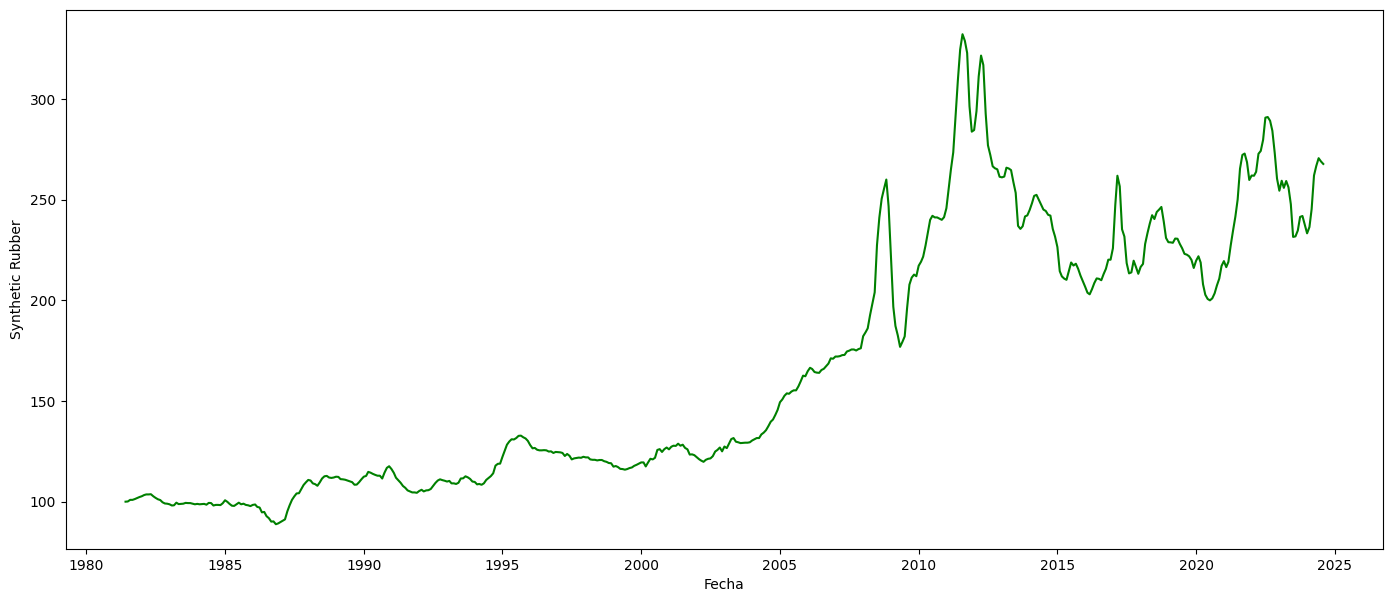

In [4]:
fig, ax = plt.subplots(figsize=(17, 7))
ax.plot(df['date'], df['synthetic_rubber'], c='green')
ax.set_xlabel('Fecha')
ax.set_ylabel('Synthetic Rubber')
plt.show()

In [5]:
df['date_year'] = df['date'].dt.year
df.head()

,date,synthetic_rubber,date_year
0,1981-06-01,100.0,1981
1,1981-07-01,100.1,1981
2,1981-08-01,100.9,1981
3,1981-09-01,100.9,1981
4,1981-10-01,101.3,1981


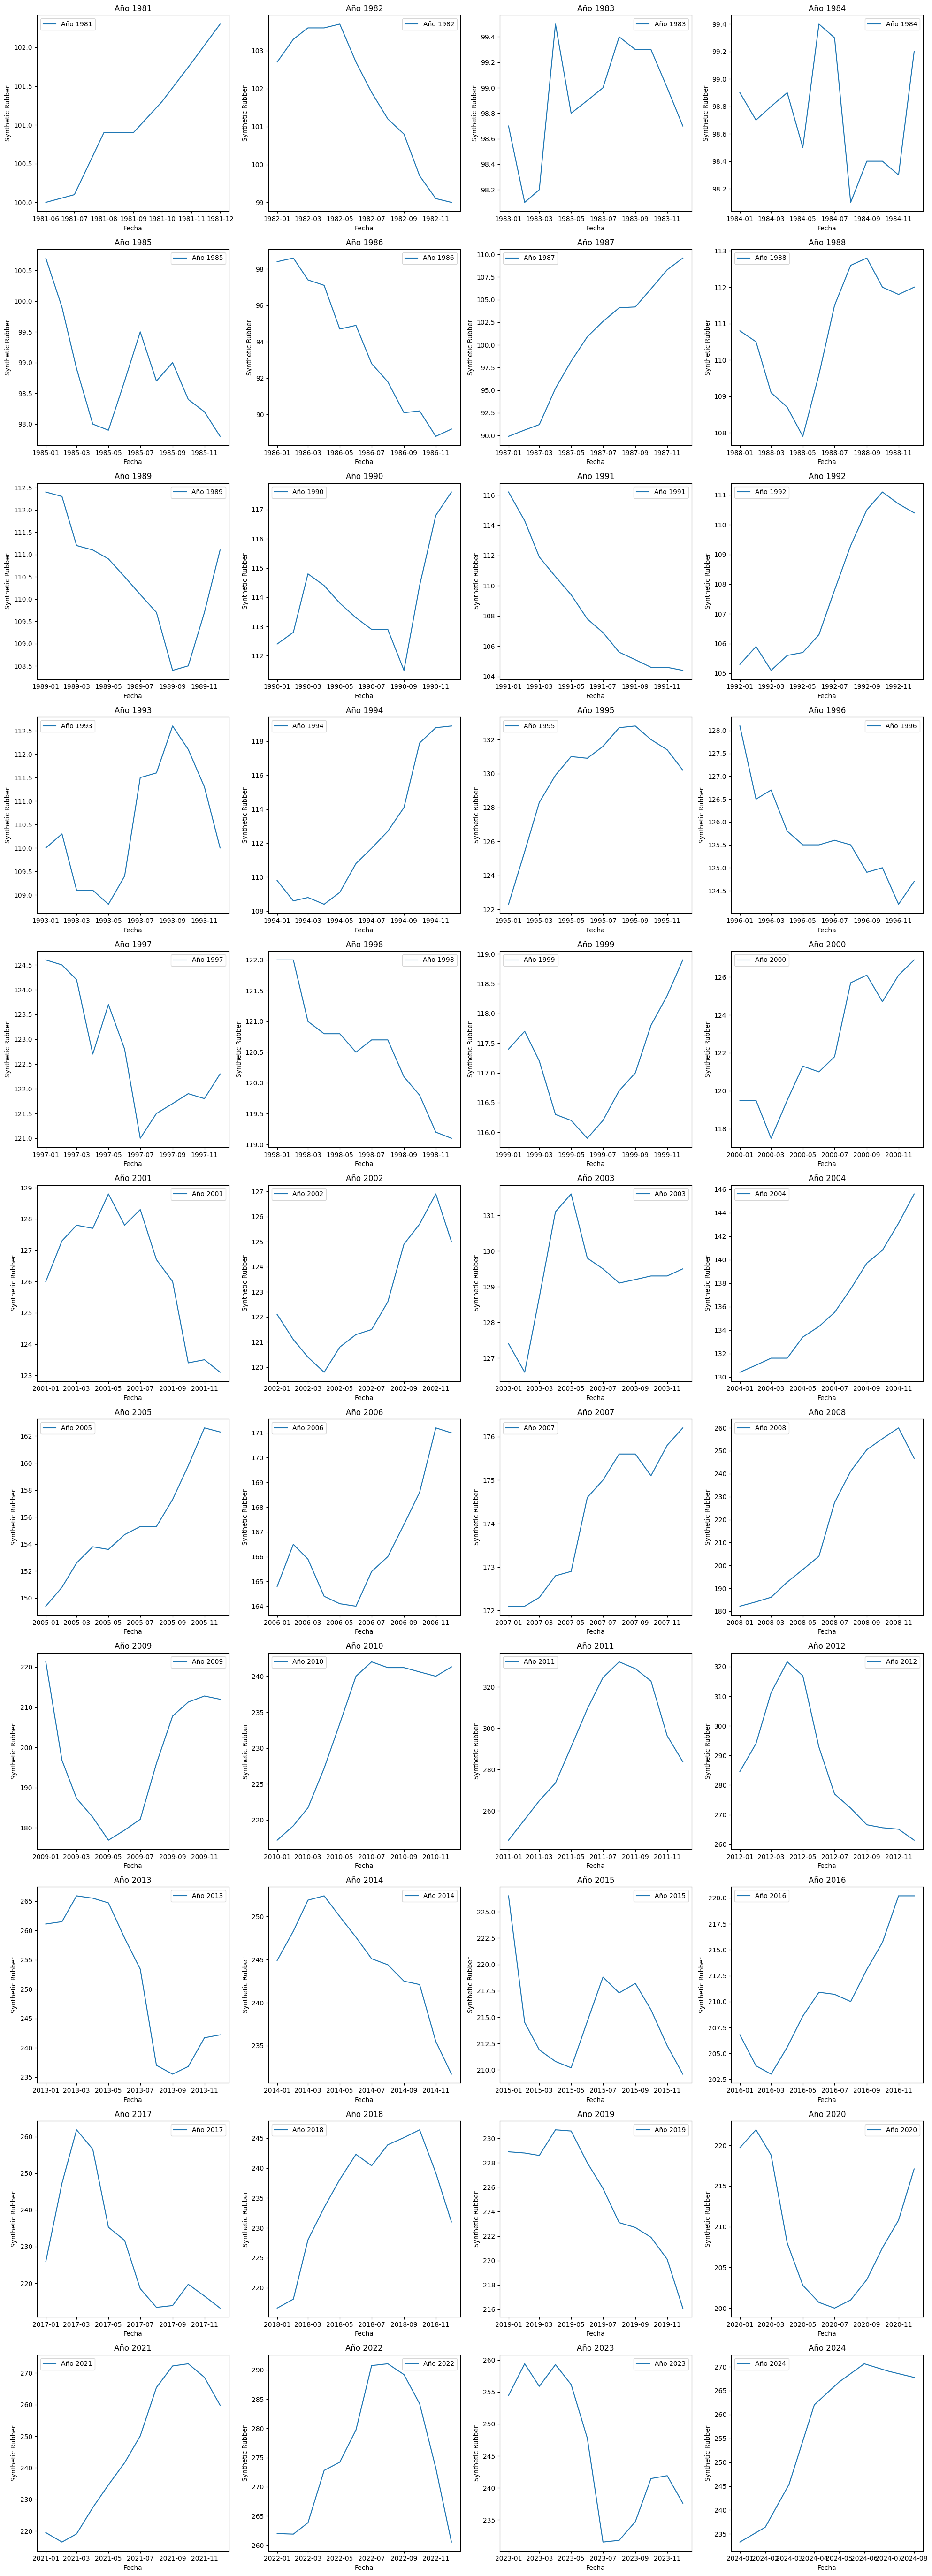

In [6]:
# Definir el número de gráficos por fila (ncols) y filas necesarias (nrows).
ncols = 4  # Número de columnas (gráficos por fila).
nrows = (len(df['date_year'].unique()) + ncols - 1) // ncols  # Número de filas necesarias.

# Crear un canvas con los subplots (figura con varios gráficos).
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5*nrows))

# Aplanar los ejes para iterar fácilmente si hay más de un gráfico.
axes = axes.flatten()

# Iterar por cada año y graficar.
for i, year in enumerate(sorted(df['date_year'].unique())):
    df_year = df[df['date_year'] == year]
    
    # Graficar la serie para el año correspondiente.
    axes[i].plot(df_year['date'], df_year['synthetic_rubber'], label=f'Año {year}')
    
    # Configurar título y etiquetas.
    axes[i].set_title(f'Año {year}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Synthetic Rubber')
    axes[i].legend()
.
# Eliminar cualquier subplot vacío (si sobran espacios en la cuadrícula)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar solapamientos.
plt.tight_layout()
plt.show()

In [7]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

<Axes: xlabel='date'>

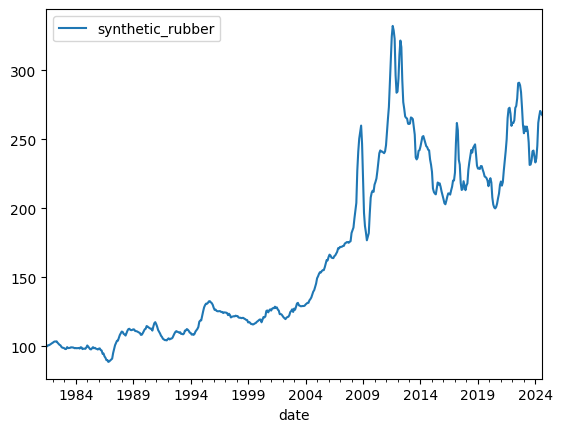

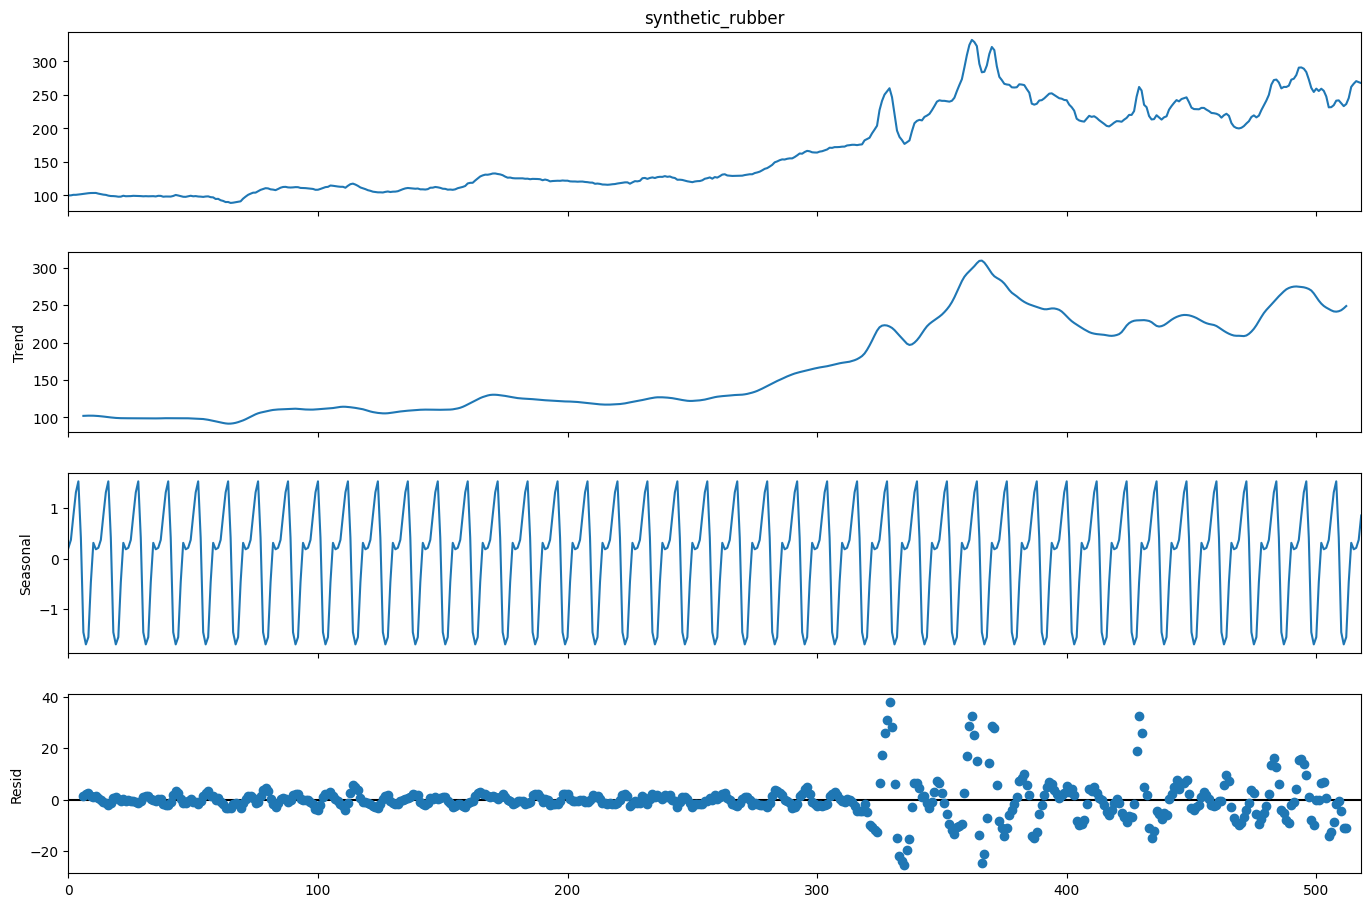

In [21]:
# decomposition (additive)
decomposition = sm.tsa.seasonal_decompose(df['synthetic_rubber'],period =12) 
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()

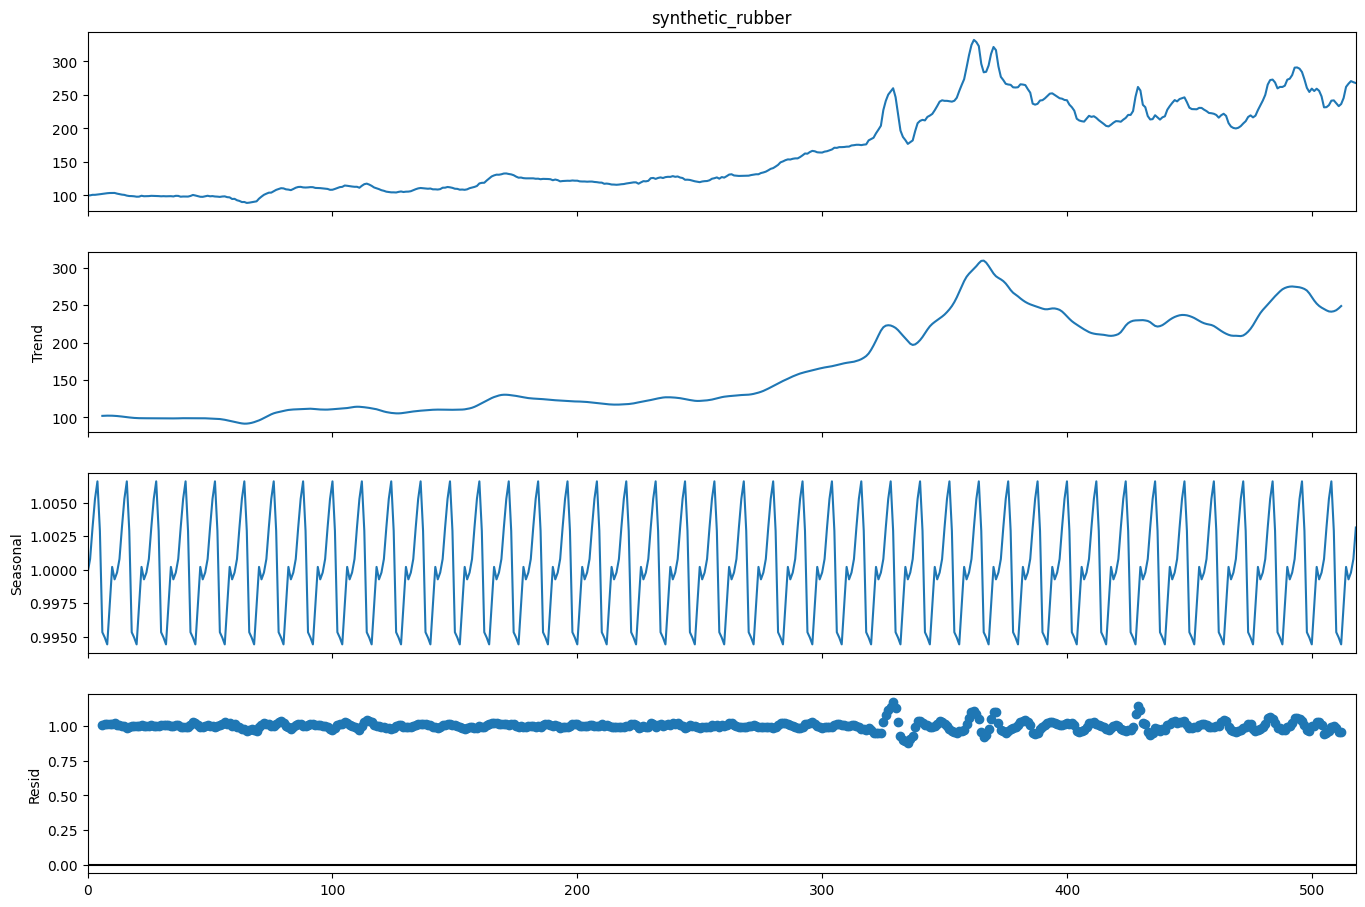

In [22]:
# decomposition (additive)
decomposition = sm.tsa.seasonal_decompose(df['synthetic_rubber'],period =12, model='multiplicative') 
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()

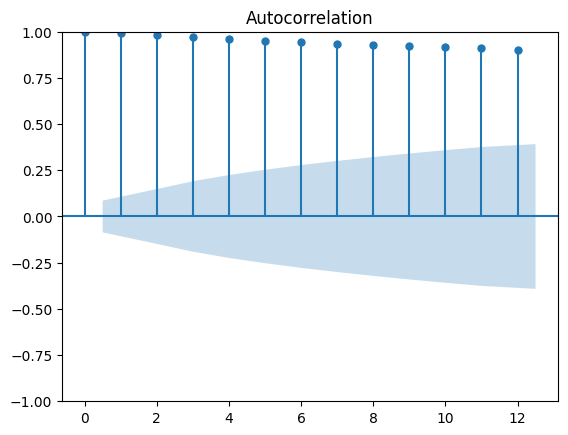

In [28]:
plot_acf(df['synthetic_rubber'], lags = 12)
print()

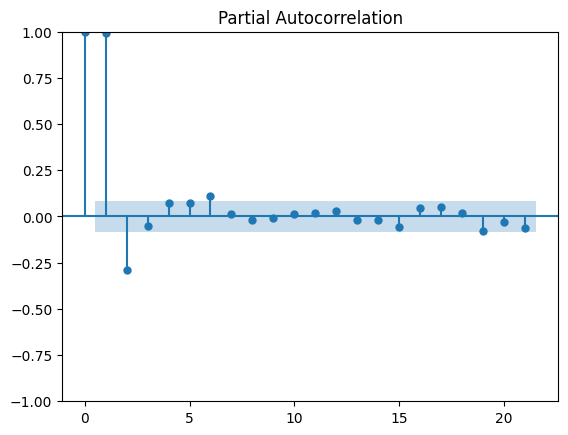

In [29]:
plot_pacf(df['synthetic_rubber'], lags = 21)
print()

In [27]:
X = df['synthetic_rubber']
split =  int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean:')
print('chunk1: %.2f vs chunk2: %.2f' % (mean1, mean2))
print('variance:')
print('chunk1: %.2f vs chunk2: %.2f' % (var1, var2))

mean:
chunk1: 111.79 vs chunk2: 219.30
variance:
chunk1: 116.31 vs chunk2: 2145.07


In [30]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.955296
p-value: 0.769218
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [31]:
decomposition = seasonal_decompose(X, model='additive', period =12)
result = adfuller(decomposition.trend[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.278739
p-value: 0.928462


In [33]:
result = adfuller(decomposition.seasonal[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1878084280831997.500000
p-value: 0.000000


In [32]:
result = adfuller(decomposition.resid[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.941262
p-value: 0.000000


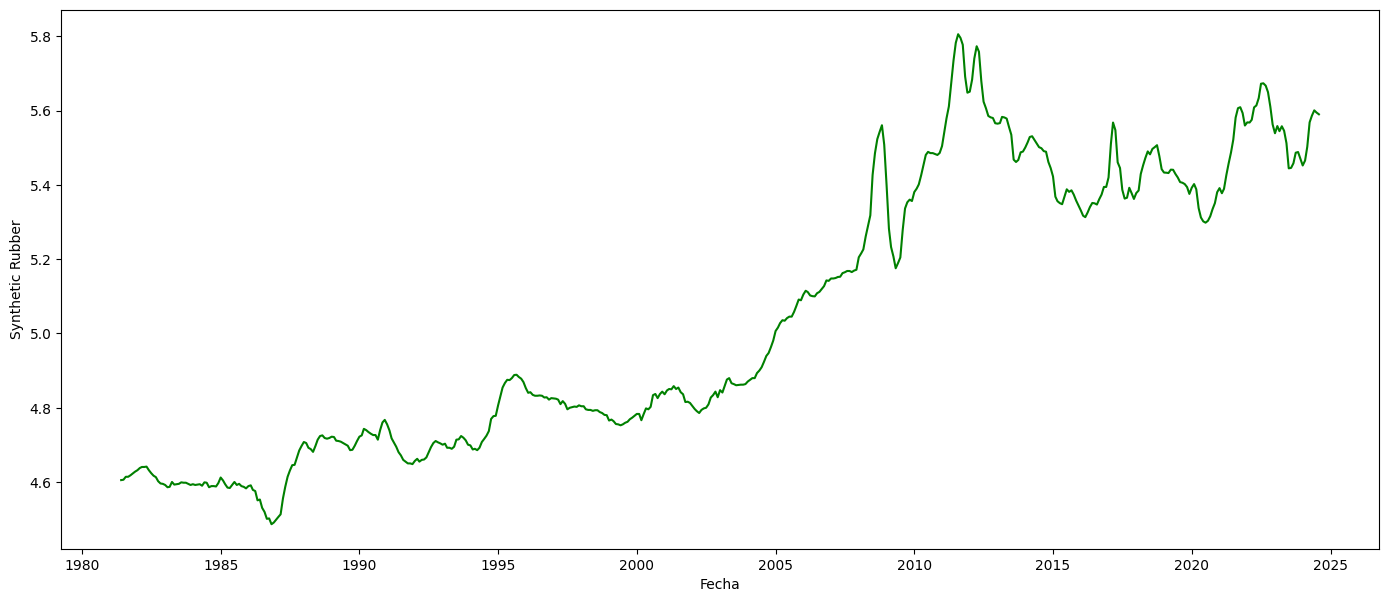

In [34]:
df['synthetic_rubber2'] = np.log(df['synthetic_rubber'])
fig, ax = plt.subplots(figsize=(17, 7))
ax.plot(df['date'], df['synthetic_rubber2'], c='green')
ax.set_xlabel('Fecha')
ax.set_ylabel('Synthetic Rubber')
plt.show()